In [46]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("files/results.csv")

##  ************תרגיל 1

In [115]:
season2008 = df[df["Season"] == "2008-09"]
home_win = season2008["FTR"] == "H"
print(str(home_win.mean() * 100) + "%")

45.526315789473685%
False


## תרגיל 2

AxesSubplot(0.125,0.125;0.775x0.755)


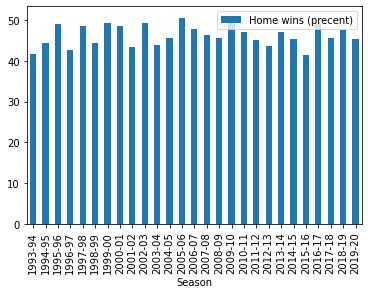

In [65]:
all_seasons = dict.fromkeys(list(df["Season"]))
for season in all_seasons:
    the_season = df[df["Season"] == season]
    all_seasons[season] = (the_season['FTR'] == 'H').mean() * 100

home_seas_wins = pd.DataFrame({"Season": list(all_seasons.keys()), "Home wins (precent)": list(all_seasons.values())})

print(home_seas_wins.plot(kind='bar', x="Season", y="Home wins (precent)"))

## תרגיל 4

## תרגיל 5 ו - 6

In [198]:
# יצירת משתנה המכיל את ממוצע משחקי הבית של כל קבוצה בעונה
aver_n_home_games_in_seas = (df.groupby("Season")["HomeTeam"].nunique() - 1).mean()

n_team_appear_in_seas = round(df["HomeTeam"].value_counts() / aver_n_home_games_in_seas)

print(n_team_appear_in_seas)
print(f"\n\n\nThe 5 teams that have appeared in the most seasons:\n\n{n_team_appear_in_seas.head()}")

Man United          27.0
Tottenham           27.0
Liverpool           27.0
Arsenal             27.0
Everton             27.0
Chelsea             27.0
Newcastle           25.0
Aston Villa         24.0
West Ham            24.0
Man City            22.0
Southampton         20.0
Blackburn           17.0
Sunderland          16.0
Leicester           14.0
Fulham              14.0
Middlesbrough       14.0
Bolton              13.0
West Brom           12.0
Leeds               11.0
Crystal Palace      10.0
Stoke               10.0
Norwich              8.0
Coventry             8.0
Wigan                8.0
Charlton             8.0
Wimbledon            7.0
Sheffield Weds       7.0
Birmingham           7.0
Swansea              7.0
Watford              7.0
Portsmouth           7.0
Derby                7.0
QPR                  6.0
Wolves               6.0
Burnley              6.0
Hull                 5.0
Bournemouth          5.0
Ipswich              4.0
Nott'm Forest        4.0
Sheffield United     3.0


## תרגיל 7

AxesSubplot(0.125,0.125;0.775x0.755)


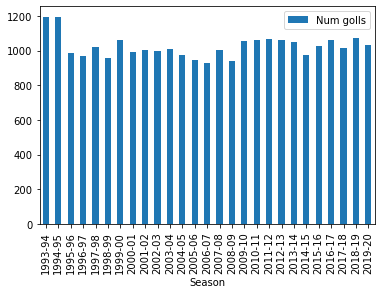

In [67]:
all_seasons = dict.fromkeys(list(df["Season"]))

for season in all_seasons:
    the_season = df[df["Season"] == season]
    season_golls = the_season["FTHG"].sum() + the_season["FTAG"].sum()
    all_seasons[season] = season_golls

seas_golls = pd.DataFrame({"Season": list(all_seasons.keys()), "Num golls": list(all_seasons.values())})
print(seas_golls.plot(kind="bar", x="Season", y="Num golls"))

## תרגיל 8

## תרגיל 9

In [83]:
all_seasons = list(dict.fromkeys(list(df["Season"])))

data ={"Season": all_seasons}

data["Team in season"] =  [len(list(dict.fromkeys( list(df[df["Season"] == season]["HomeTeam"]) ))) for season in all_seasons]
df3 = pd.DataFrame(data)

if df3["Team in season"].nunique() == 1:
    print(True)
else:
    print(False)

False


## תרגיל 10

In [84]:
all_teams = df["AwayTeam"]
print(all_teams.nunique())

49


## תרגיל 11

In [100]:
seasons = df.groupby("Season")

for seas_name, seas in seasons:
    print(f"{seas_name}: {len(seas) // (seas['AwayTeam'].nunique() // 2)}", end="  |  ")

1993-94: 42  |  1994-95: 42  |  1995-96: 38  |  1996-97: 38  |  1997-98: 38  |  1998-99: 38  |  1999-00: 38  |  2000-01: 38  |  2001-02: 38  |  2002-03: 38  |  2003-04: 38  |  2004-05: 38  |  2005-06: 38  |  2006-07: 38  |  2007-08: 38  |  2008-09: 38  |  2009-10: 38  |  2010-11: 38  |  2011-12: 38  |  2012-13: 38  |  2013-14: 38  |  2014-15: 38  |  2015-16: 38  |  2016-17: 38  |  2017-18: 38  |  2018-19: 38  |  2019-20: 38  |  

## תרגיל 12

In [101]:
all_season = dict.fromkeys(list(df["Season"]))

for season, the_season in df.groupby("Season"):
    num_seas_teams = len(list(dict.fromkeys(list(the_season["AwayTeam"]))))
    num_seas_games = len(the_season)
    
    if ( (num_seas_teams - 1) * 2 * (num_seas_teams / 2) != num_seas_games ):
        print(f'in season {season} not all the teams play enough games')

## תרגיל 13

## 14 תרגיל

In [102]:
data = {"Season": [], "Team": [], "Points in season": []}

for season, the_season in df.groupby("Season"):
    
    all_teams = list(set(the_season["AwayTeam"]))
    for team in all_teams:
        n_team_wins = len(the_season[((the_season["HomeTeam"] == team) & (the_season["FTR"] == "H")) | ((the_season["AwayTeam"] == team) & (the_season["FTR"] == "A"))])

        n_team_draws = len(the_season[((the_season["HomeTeam"] == team) | (the_season["AwayTeam"] == team)) & (the_season["FTR"] == "D")])
        team_seas_points = n_team_wins * 3 + n_team_draws

        data["Season"].append(season)
        data["Team"].append(team)
        data["Points in season"].append(team_seas_points)

seas_table = pd.DataFrame(data).sort_values(["Season", "Points in season"], ascending=[True, False])
seas_table.index = pd.RangeIndex(1, len(seas_table) + 1, 1)
print(seas_table)

      Season         Team  Points in season
1    1993-94   Man United                92
2    1993-94    Blackburn                84
3    1993-94    Newcastle                77
4    1993-94      Arsenal                71
5    1993-94        Leeds                70
..       ...          ...               ...
540  2019-20     West Ham                39
541  2019-20  Aston Villa                35
542  2019-20      Watford                34
543  2019-20  Bournemouth                34
544  2019-20      Norwich                21

[544 rows x 3 columns]


## תרגיל 15

In [11]:
all_seasons = list(dict.fromkeys(list(df["Season"])))

count = 0
for season in all_seasons[:-1]:
    
    the_season_table = seas_table[seas_table["Season"] == season]
    leading_seas_teams = the_season_table.head()
    

    next_season = all_seasons[all_seasons.index(season) + 1]
    leading_next_seas_teams = seas_table[seas_table["Season"] == next_season].head()
    
    for lteam in leading_seas_teams.values:
        for LNteam in leading_next_seas_teams.values:
            if lteam[1] == LNteam[1]:
                count += 1
                break
            
print(f"{(count / ((len(all_seasons) - 1) * 5)) * 100:.3f}%")

75.385%


## תרגיל 16

In [12]:
all_teams = dict.fromkeys(list(df["AwayTeam"]))

for team in all_teams:
    team_games = df[(df["AwayTeam"] == team) | (df["HomeTeam"] == team)]
    
    draws_game = team_games[team_games["FTR"] == "D"]
    all_teams[team] = f"{len(draws_game) / len(team_games) * 100:.3f}%"
print(all_teams)

{'Coventry': '31.731%', 'QPR': '22.458%', 'Blackburn': '26.453%', 'Sheffield Weds': '27.372%', 'Leeds': '25.822%', 'Tottenham': '24.855%', 'Ipswich': '23.125%', 'Swindon': '35.714%', 'Everton': '28.820%', 'Wimbledon': '29.927%', 'Man United': '21.663%', 'Arsenal': '25.435%', 'Man City': '22.156%', 'Southampton': '27.344%', 'West Ham': '25.761%', 'Chelsea': '24.081%', 'Norwich': '28.526%', 'Newcastle': '25.574%', 'Sheffield United': '32.203%', 'Liverpool': '24.565%', 'Aston Villa': '29.565%', 'Oldham': '30.952%', "Nott'm Forest": '31.410%', 'Leicester': '26.866%', 'Crystal Palace': '23.438%', 'Bolton': '25.911%', 'Middlesbrough': '29.699%', 'Sunderland': '26.151%', 'Derby': '26.316%', 'Barnsley': '13.158%', 'Charlton': '26.974%', 'Bradford': '26.316%', 'Watford': '22.932%', 'Fulham': '26.504%', 'West Brom': '28.070%', 'Birmingham': '30.827%', 'Wolves': '27.632%', 'Portsmouth': '24.436%', 'Wigan': '25.000%', 'Reading': '20.175%', 'Stoke': '28.684%', 'Hull': '25.263%', 'Burnley': '23.246%

## תרגיל 17

In [103]:
all_seasons = list(dict.fromkeys(list(df["Season"])))

count = 0
for season, the_season in df.groupby("Season"):
    seas_teams = dict.fromkeys(list(the_season["AwayTeam"]))
    
    for team in seas_teams:
        team_Hgames = the_season[the_season["HomeTeam"] == team]
        team_Agames = the_season[the_season["AwayTeam"] == team]
        
        team_golls = team_Agames["FTAG"].sum() + team_Hgames["FTHG"].sum()
        seas_teams[team] = team_golls
    
    seas_teams = sorted(seas_teams.items(), key=lambda x: x[0], reverse=True)
    most_golls_team = seas_teams[0][0]
    
    # שימוש בטבלה שיצרנו בתרגיל 14 כדי להשיג את מנצח הליגה
    win_league = seas_table[seas_table["Season"] == season].values[0][1]
    
    if most_golls_team == win_league:
        count += 1

print(f"{count} from {len(all_seasons)}")

0 from 27


## תרגיל 18

In [ ]:
all_teams = list(dict.fromkeys(list(df["AwayTeam"])))

for team in all_teams:
    team_Hgames = df[df["HomeTeam"] == team]
    team_Agames = df[df["AwayTeam"] == team]
    
    for Agame in team_Agames.values:
        